# Grouping - Imputation

Aka filling in missing values

Let's continue using the sales data:
https://www.kaggle.com/c/rossmann-store-sales/data

This is not filling in missing data in a group by, its using group by to more intelligently fill in missing data.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
dfo = pd.read_csv("train.csv", low_memory=False, parse_dates=["Date"])
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Lets say that some annoying compute malfunction has corrupted 10% of our sales data, and set it to NaN. First, lets look at the data.

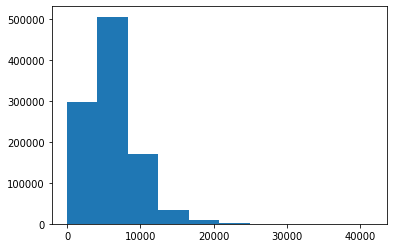

In [28]:
plt.hist(dfo.Sales);

(844392, 9)


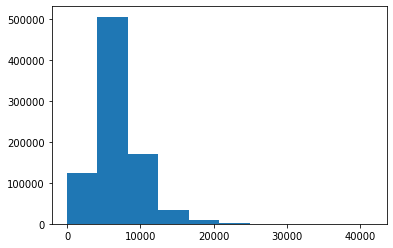

In [43]:
#filtered by open stores
df = dfo[dfo.Open == 1].copy()
plt.hist(df.Sales)
print(df.shape);

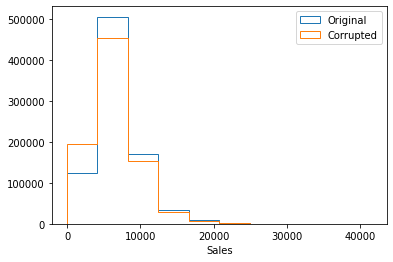

In [30]:
#mask do screw de data
mask = np.random.choice(10, size=df.shape[0]) == 0
df["NewSales"] = df.Sales.copy()
df.loc[mask, "NewSales"] = np.nan

plt.hist(df.Sales, label="Original", histtype="step")
# fillnan = 0
plt.hist(df.NewSales.fillna(0), label="Corrupted", histtype="step")
plt.legend(), plt.xlabel("Sales");

Lets see what happens if we just fill with the mean, and we'll use a new function, `transform`. Transform is similar to apply, but it has to return a series the same size as the input.

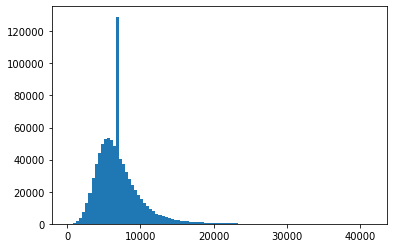

In [31]:
# X here is a series and  because it's a panda series called fillner and also get the mean.
# It get a new series here, which is the new sales, but all the other numbers are 
# filled with instead of not a number. The main value of the entire series.

The main value of the entire series.
test_fix = df.NewSales.transform(lambda x: x.fillna(x.mean()))
plt.hist(test_fix, bins=100);

Not the best...

From previous examples, we know that some stores are far above others, and that sales vary significantly over the day of week. But maybe its good enough if we take those two factors into consideration.

In [45]:
dfg = df.groupby(["Store", "DayOfWeek"])
# dfg.Sales.median().head()
dfg.median().head()

Sales  Customers  Open  Promo  SchoolHoliday
Store DayOfWeek                                               
1     1          5302.5      581.0   1.0    1.0            0.0
      2          4640.5      549.5   1.0    1.0            0.0
      3          4549.5      533.0   1.0    1.0            0.0
      4          4380.0      525.0   1.0    1.0            0.0
      5          4651.0      552.0   1.0    1.0            0.0

Now to utilise `transform` again, this time on the group! Unlike apply or similar functions, transform requires that the output size is the same as in the input. So no condensing down numbers. You can think of it like aggregating to get a single number, but then backfilling it according to the correct group.

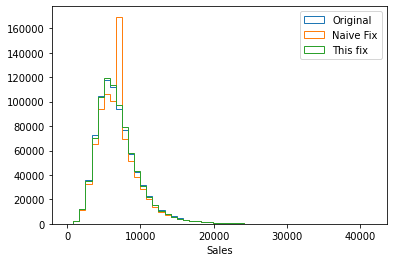

In [33]:
test_fix2 = dfg.NewSales.transform(lambda x: x.fillna(x.mean()))

opts = {"histtype": "step", "bins": 50}
# **opts ==  this is unpacking this dictionary as if I typed out his type equal step.
plt.hist(df.Sales, label="Original", **opts)
plt.hist(test_fix, label="Naive Fix", **opts)
plt.hist(test_fix2, label="This fix", **opts)
plt.legend(), plt.xlabel("Sales");

Sales is a skewed distribution, so better to use the median(more close to the center) than the mean. The performance of the previous days - above or below the mean - might be a good indicator for performance. But now we're heading into machine learning territory, which is too vast a topic to cover here!

### Recap
* Use known relationships and group by to do smarter imputation
* transformation is new

One of the major ones that apply can return a series just like Transform does, but it doesn't have to.
It can return just a number. A single value transform doesn't.
Transform is designed to make sure youif you put a series of 100 in. You get a series of 100 out.

https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object